## Read the pre-computed global/local keys file
This file, called `key_analysis.txt`, was computed by calling `justkeydding v1.12.0` directly from the bash terminal

```bash
python -m justkeydding --json NAME_OF_THE_FILE
```

The file is structured in pairs of lines. The first line of each pair contains the name of the file. The second one, the `json` output given by `justkeydding v1.12.0`.

In [26]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [27]:
with open('key_analysis.txt') as fd:
    lines = fd.readlines()

Preprocessing the name of the files so that they are easier to organize

In [28]:
key_numbers = {
    'C': 0, 'C#': 1, 'Db': 1, 'D': 2,
    'D#': 3, 'Eb': 3, 'E': 4, 'F': 5,
    'F#': 6, 'Gb': 6, 'G': 7, 'G#': 8,
    'Ab': 8, 'A': 9, 'A#': 10, 'Bb': 10,
    'B': 11,

    'c': 12, 'c#': 13, 'db': 13, 'd': 14,
    'd#': 15, 'eb': 15, 'e': 16, 'f': 17,
    'f#': 18, 'gb': 18, 'g': 19, 'g#': 20,
    'ab': 20, 'a': 21, 'a#': 22, 'bb': 22,
    'b': 23
}

def parse_filename(f):
    f = f.replace('.musicxml', '').rsplit('_', 1)
    filename, stage = f
    return filename, stage

def encode_key(key_string):
    return key_numbers[key_string]    

Turning the lines into a dictionary

In [36]:
analyses_by_file = {}
for name, analysis in zip(lines[::2], lines[1::2]):
    # Decompose the file name into file name and stage of the workflow
    filename, stage = parse_filename(name.strip())
    # Get the dictionary for this file, if None, create one now 
    columns = analyses_by_file.get(filename, {'local_key_index': []})
    # Turn the json string in the file into a dictionary 
    jsondict = json.loads(analysis.strip())
    # After the json conversion, the time indexes were encoded as string. Converting them to float.
    jsondict['local_keys'] = {float(k): encode_key(v) for k, v in jsondict['local_keys'].items()}
    # The local key index might be different for every stage, get the index of this stage
    local_keys_index = list(jsondict['local_keys'].keys())
    # Add the unique indexes of this stage to the shared local-key index of the file
    general_index = columns['local_key_index']
    general_index = list(sorted(set(general_index + local_keys_index)))
    columns['local_key_index'] = general_index
    columns_with_version = {(k + '_' + stage): v for k, v in jsondict.items()}
    columns.update(columns_with_version)
    analyses_by_file[filename] = columns

Now that everything is in well-organized dictionaries grouped by file, they can be turned into DataFrames

1_op12_1
['c', 'Eb', 'Eb', 'Eb']
      local_key_index    stage  local_key
0                 0.0  aligned        8.0
1                 2.0  aligned        8.0
2                 3.5  aligned        8.0
3                 4.0  aligned        8.0
4                 8.5  aligned        3.0
...               ...      ...        ...
7675           1155.5  revised        3.0
7676           1156.0  revised        3.0
7677           1157.0  revised        3.0
7678           1160.0  revised        3.0
7679           1164.0  revised        3.0

[7680 rows x 3 columns]


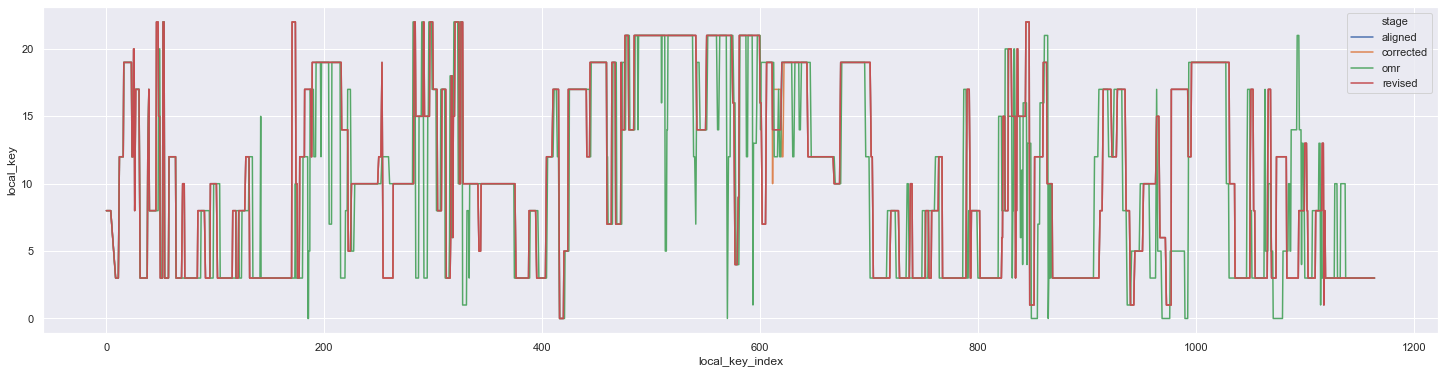

1_op12_2
['G', 'G', 'G', 'G']
      local_key_index    stage  local_key
0                0.00  aligned       19.0
1                0.50  aligned       19.0
2                1.00  aligned       19.0
3                1.50  aligned       19.0
4                2.00  aligned       19.0
...               ...      ...        ...
4075           264.25  revised       19.0
4076           264.50  revised       19.0
4077           264.75  revised       19.0
4078           265.25  revised       19.0
4079           265.75  revised       19.0

[4080 rows x 3 columns]


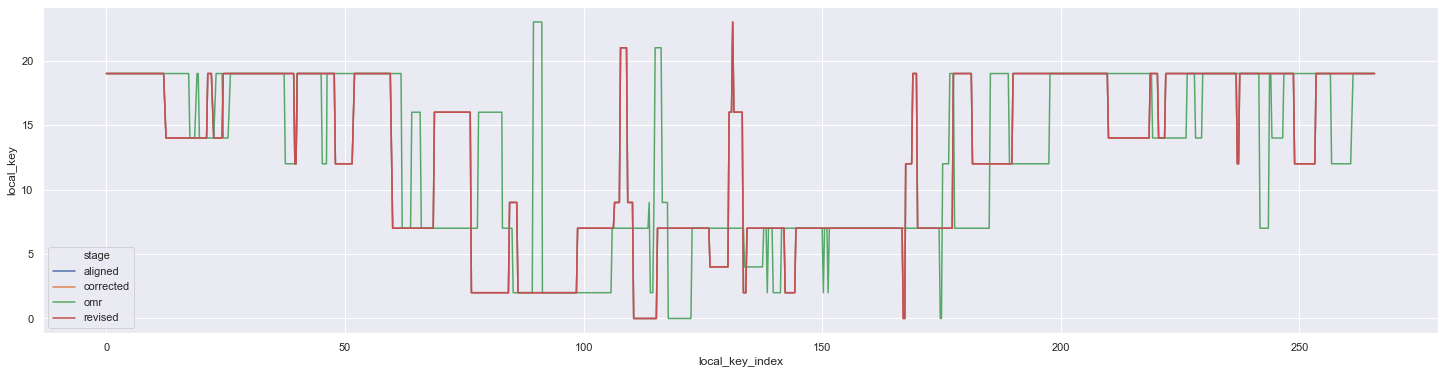

1_op12_3
['Bb', 'Bb', 'Bb', 'Bb']
      local_key_index    stage  local_key
0                 0.0  aligned       10.0
1                 1.0  aligned       10.0
2                 1.5  aligned       10.0
3                 2.0  aligned       10.0
4                 2.5  aligned       10.0
...               ...      ...        ...
2003            188.5  revised        3.0
2004            189.0  revised        3.0
2005            190.0  revised       10.0
2006            191.0  revised       10.0
2007            192.0  revised       10.0

[2008 rows x 3 columns]


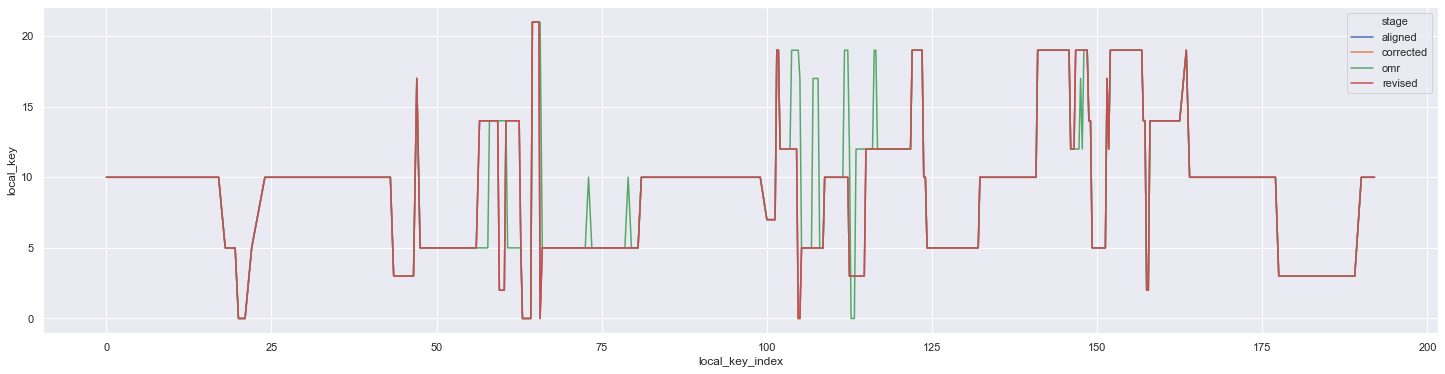

1_op12_4
['c', 'c', 'c', 'c']
       local_key_index    stage  local_key
0                  0.0  aligned        7.0
1                  1.5  aligned        7.0
2                  3.0  aligned        7.0
3                  3.5  aligned       12.0
4                  4.0  aligned       12.0
...                ...      ...        ...
11543           1667.0  revised        3.0
11544           1667.5  revised        3.0
11545           1668.0  revised        3.0
11546           1672.0  revised        3.0
11547           1676.0  revised        3.0

[11548 rows x 3 columns]


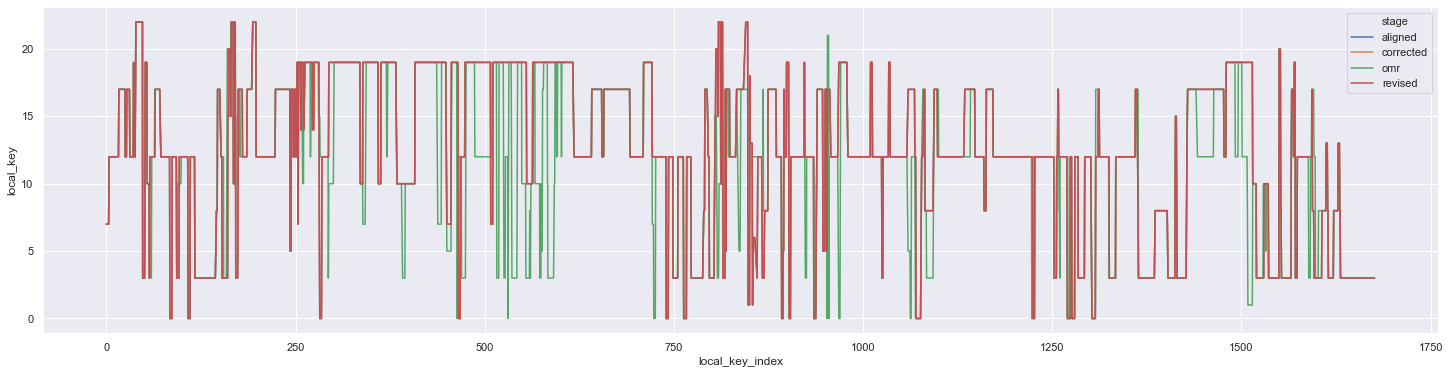

2_op13_1
['A', 'a', 'a', 'a']
       local_key_index    stage  local_key
0                  0.0  aligned        NaN
1                  2.5  aligned        9.0
2                  3.0  aligned        9.0
3                  5.0  aligned        9.0
4                  6.0  aligned        9.0
...                ...      ...        ...
10087            981.5  revised       21.0
10088            982.0  revised       21.0
10089            983.0  revised       21.0
10090            985.0  revised       21.0
10091            985.5  revised       21.0

[10092 rows x 3 columns]


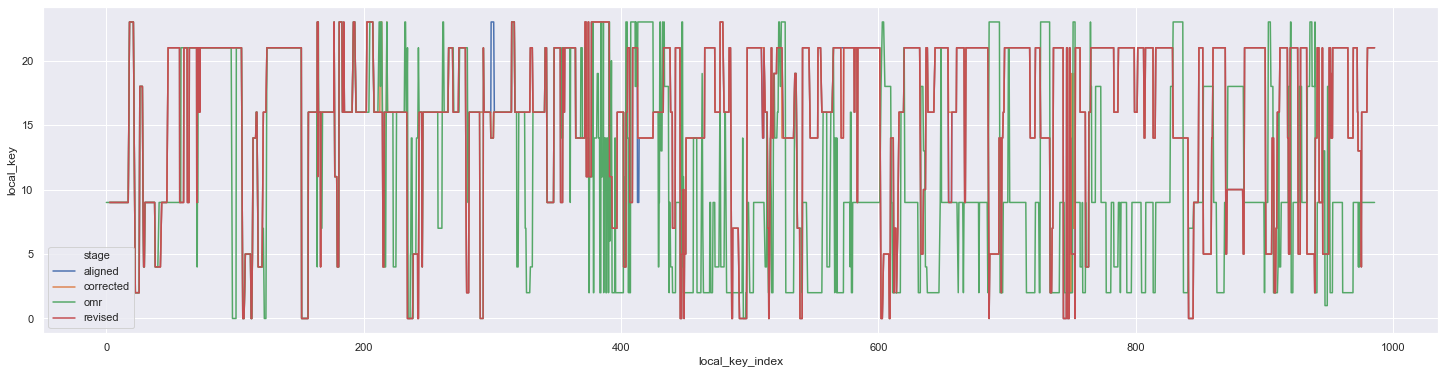

2_op13_2
['F', 'd', 'd', 'd']
      local_key_index    stage  local_key
0                0.00  aligned        5.0
1                2.00  aligned        5.0
2                2.50  aligned        5.0
3                2.75  aligned        5.0
4                3.00  aligned        5.0
...               ...      ...        ...
5519           387.25  revised        5.0
5520           387.75  revised        5.0
5521           388.75  revised        5.0
5522           389.25  revised        5.0
5523           389.75  revised        5.0

[5524 rows x 3 columns]


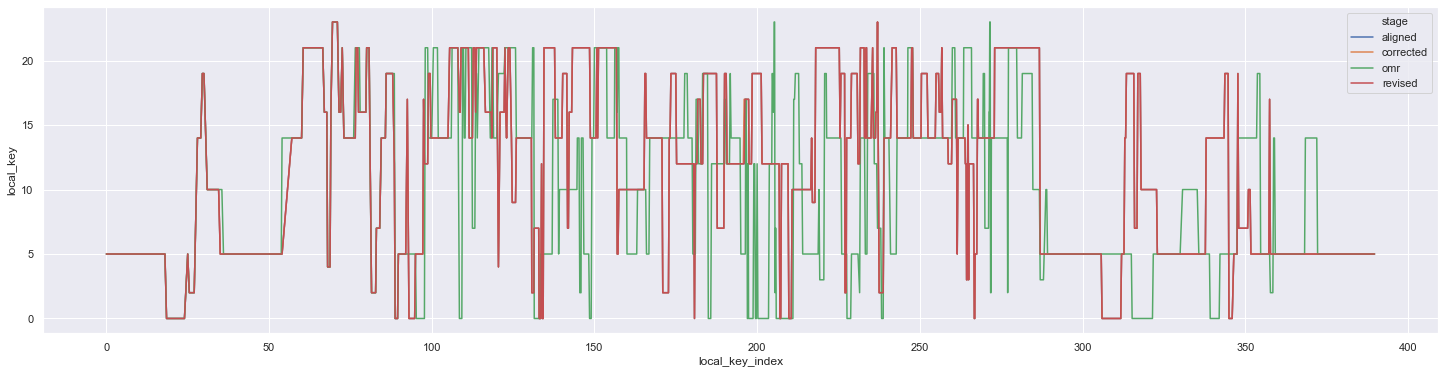

2_op13_3
['a', 'a', 'a', 'a']
      local_key_index    stage  local_key
0                0.00  aligned       21.0
1                0.50  aligned       21.0
2                0.75  aligned       21.0
3                1.00  aligned       21.0
4                1.50  aligned       21.0
...               ...      ...        ...
4219           325.00  revised       21.0
4220           325.25  revised       21.0
4221           325.50  revised       21.0
4222           326.00  revised       21.0
4223           326.25  revised       21.0

[4224 rows x 3 columns]


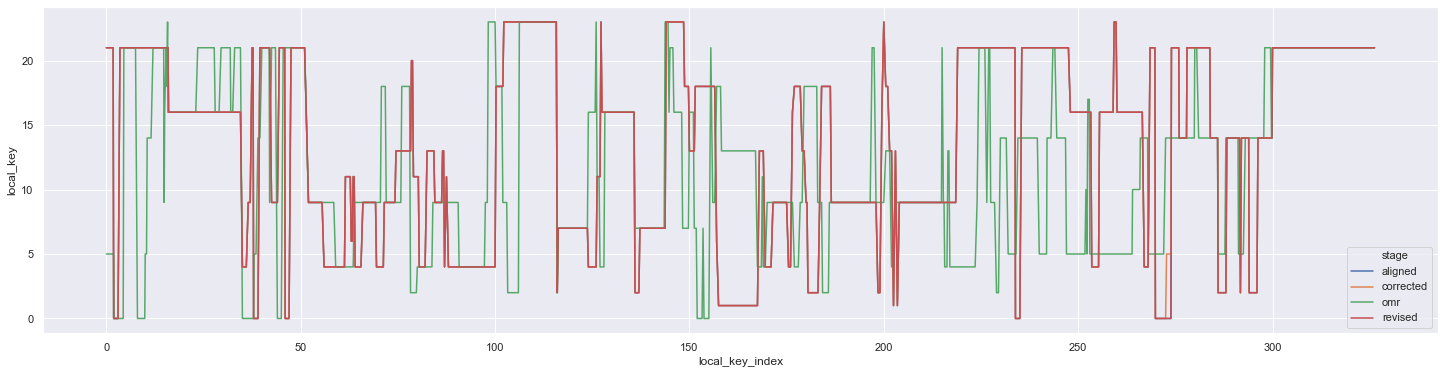

2_op13_4
['a', 'a', 'a', 'a']
       local_key_index    stage  local_key
0                 0.00  aligned       14.0
1                 0.25  aligned       14.0
2                 0.50  aligned       14.0
3                 0.75  aligned       14.0
4                 1.00  aligned       14.0
...                ...      ...        ...
11339          1555.00  revised        9.0
11340          1556.00  revised        9.0
11341          1557.00  revised        9.0
11342          1558.00  revised        9.0
11343          1559.00  revised        9.0

[11344 rows x 3 columns]


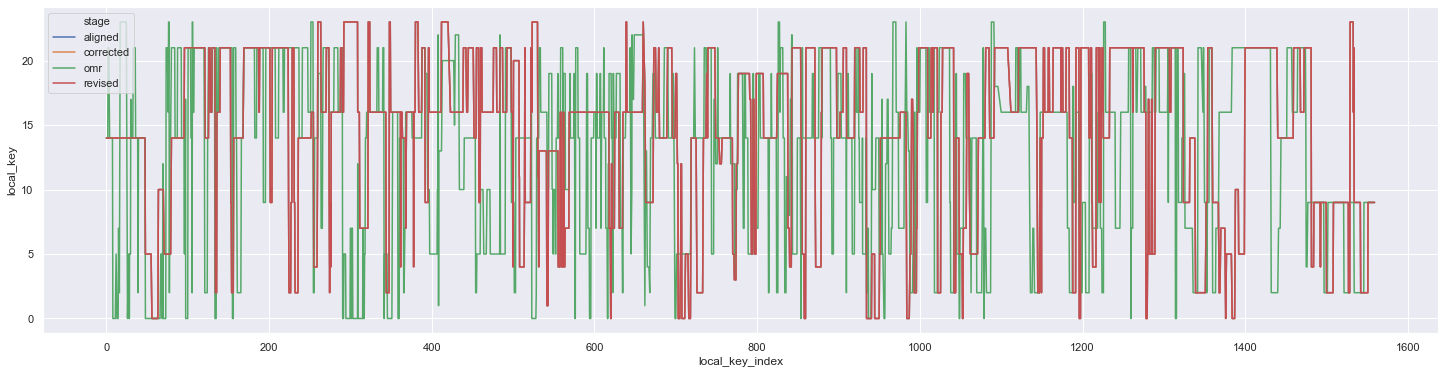

3_op44i_1
['D', 'D', 'D', 'D']
       local_key_index    stage  local_key
0                  0.0  aligned        2.0
1                  0.5  aligned        2.0
2                  1.0  aligned        2.0
3                  2.0  aligned        2.0
4                  2.5  aligned        2.0
...                ...      ...        ...
16511           1490.0  revised        2.0
16512           1491.5  revised        2.0
16513           1492.0  revised        9.0
16514           1494.0  revised        9.0
16515           1496.0  revised        2.0

[16516 rows x 3 columns]


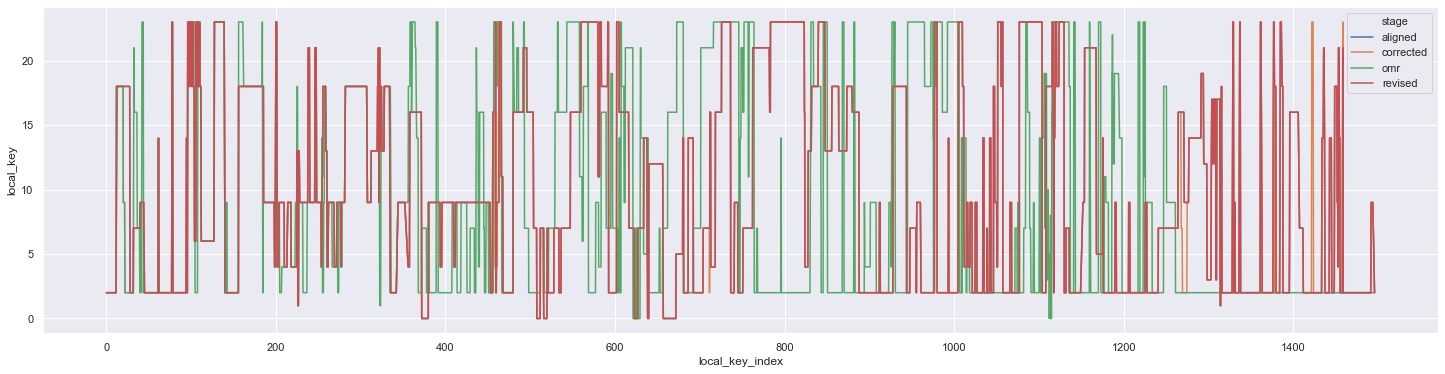

3_op44i_2
['b', 'b', 'b', 'b']
      local_key_index    stage  local_key
0                 0.0  aligned        7.0
1                 1.0  aligned        7.0
2                 3.0  aligned        7.0
3                 4.0  aligned        7.0
4                 5.0  aligned        7.0
...               ...      ...        ...
4075            683.0  revised       18.0
4076            684.0  revised       18.0
4077            686.0  revised       18.0
4078            687.0  revised       18.0
4079            688.0  revised       18.0

[4080 rows x 3 columns]


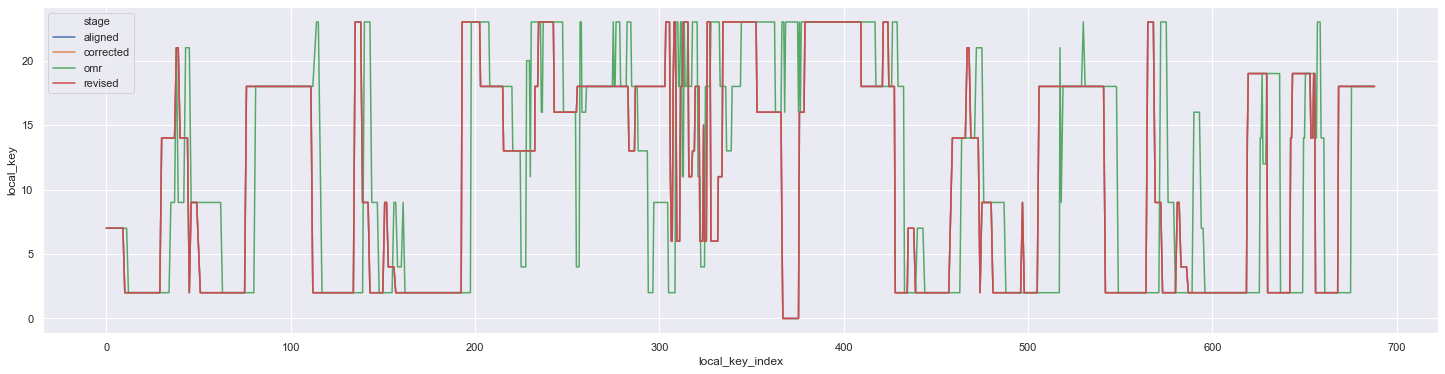

3_op44i_3
['b', 'b', 'b', 'b']
      local_key_index    stage  local_key
0                0.00  aligned       23.0
1                0.25  aligned       23.0
2                0.50  aligned       23.0
3                0.75  aligned       23.0
4                1.00  aligned       23.0
...               ...      ...        ...
5071           307.00  revised       23.0
5072           307.25  revised       23.0
5073           307.50  revised       23.0
5074           307.75  revised       23.0
5075           308.00  revised       23.0

[5076 rows x 3 columns]


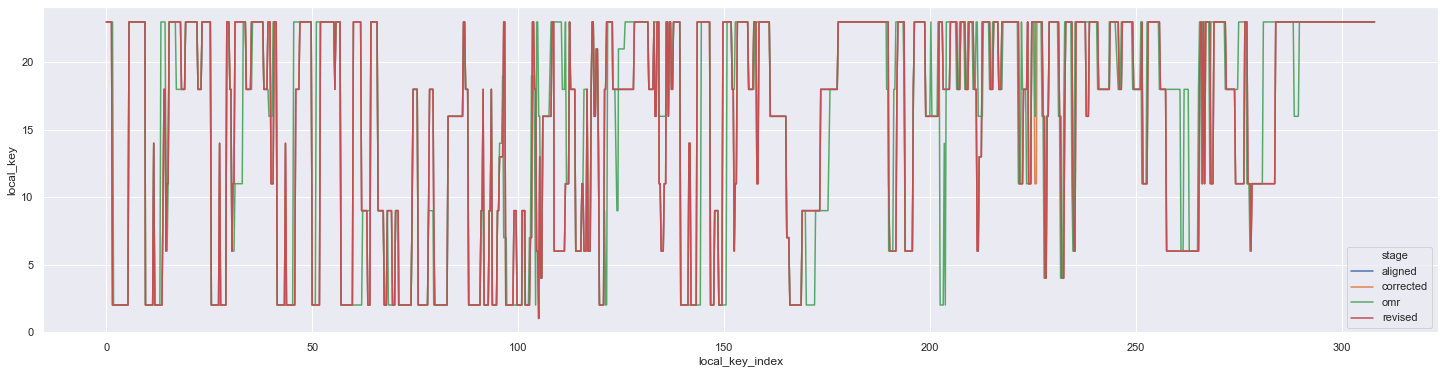

3_op44i_4
['D', 'D', 'D', 'D']
       local_key_index    stage  local_key
0                  0.0  aligned        2.0
1                  3.0  aligned        2.0
2                  4.5  aligned        2.0
3                  6.0  aligned        2.0
4                  7.5  aligned        2.0
...                ...      ...        ...
13315           1892.0  revised        2.0
13316           1892.5  revised        2.0
13317           1893.0  revised        2.0
13318           1896.0  revised        2.0
13319           1896.5  revised        2.0

[13320 rows x 3 columns]


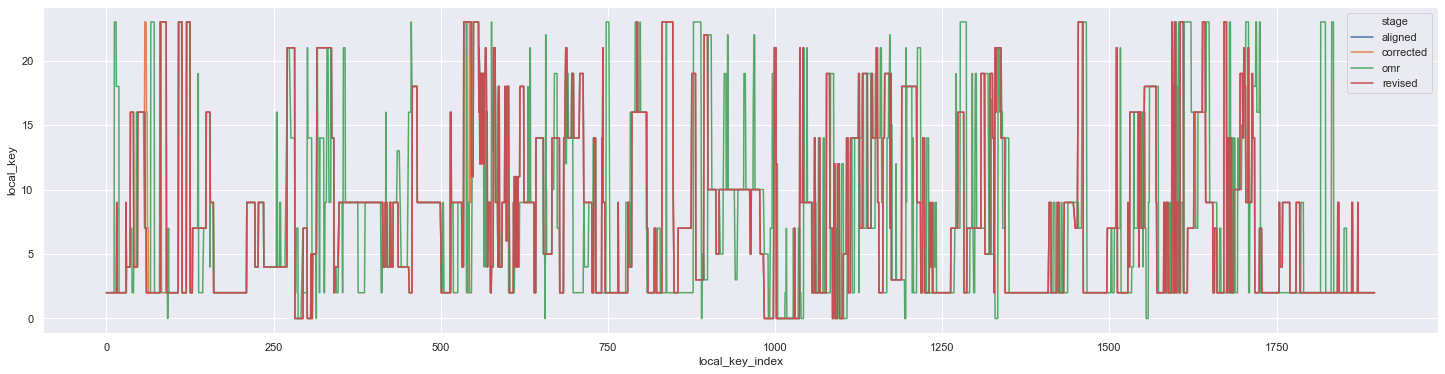

4_op44ii_1
['e', 'e', 'e', 'e']
       local_key_index    stage  local_key
0                 0.00  aligned       16.0
1                 0.50  aligned       16.0
2                 1.50  aligned       16.0
3                 2.00  aligned       16.0
4                 2.50  aligned       16.0
...                ...      ...        ...
11215          1119.75  revised       16.0
11216          1120.00  revised       16.0
11217          1122.00  revised       16.0
11218          1123.00  revised       16.0
11219          1124.00  revised       16.0

[11220 rows x 3 columns]


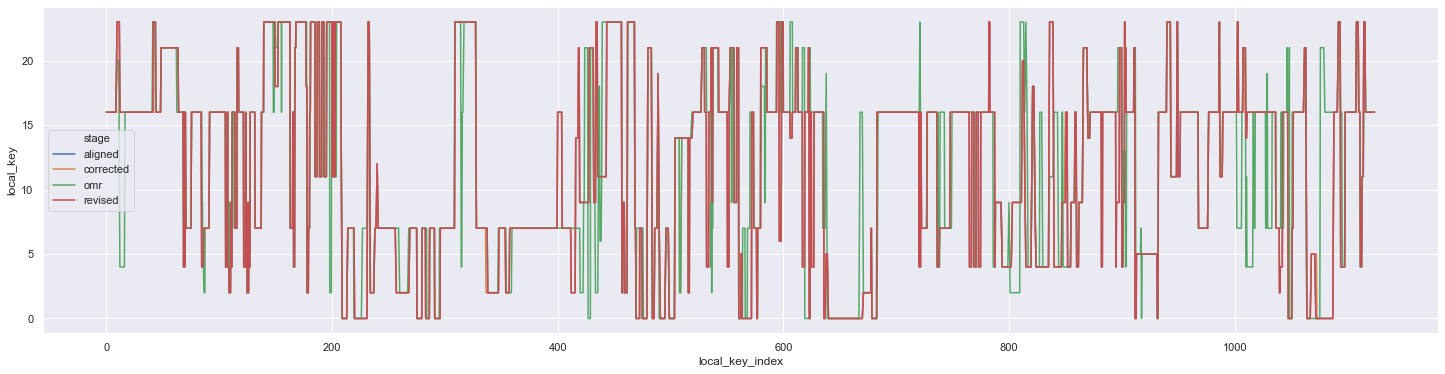

4_op44ii_2
['E', 'E', 'E', 'E']
      local_key_index    stage  local_key
0                0.00  aligned        4.0
1                0.25  aligned        4.0
2                0.50  aligned        4.0
3                0.75  aligned        4.0
4                1.00  aligned        4.0
...               ...      ...        ...
6963           725.00  revised        4.0
6964           726.00  revised        4.0
6965           728.00  revised        4.0
6966           729.00  revised        4.0
6967           731.00  revised        4.0

[6968 rows x 3 columns]


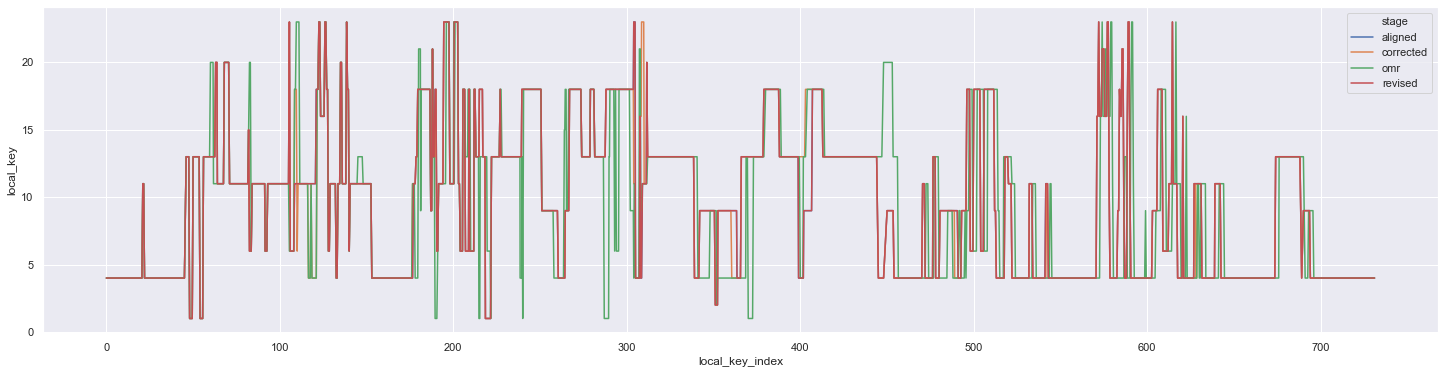

4_op44ii_3
['G', 'G', 'G', 'G']
      local_key_index    stage  local_key
0                0.00  aligned        7.0
1                0.25  aligned        7.0
2                0.50  aligned        7.0
3                0.75  aligned        7.0
4                1.00  aligned        7.0
...               ...      ...        ...
5167           323.00  revised        7.0
5168           324.00  revised        7.0
5169           326.00  revised        7.0
5170           327.00  revised        7.0
5171           328.00  revised        7.0

[5172 rows x 3 columns]


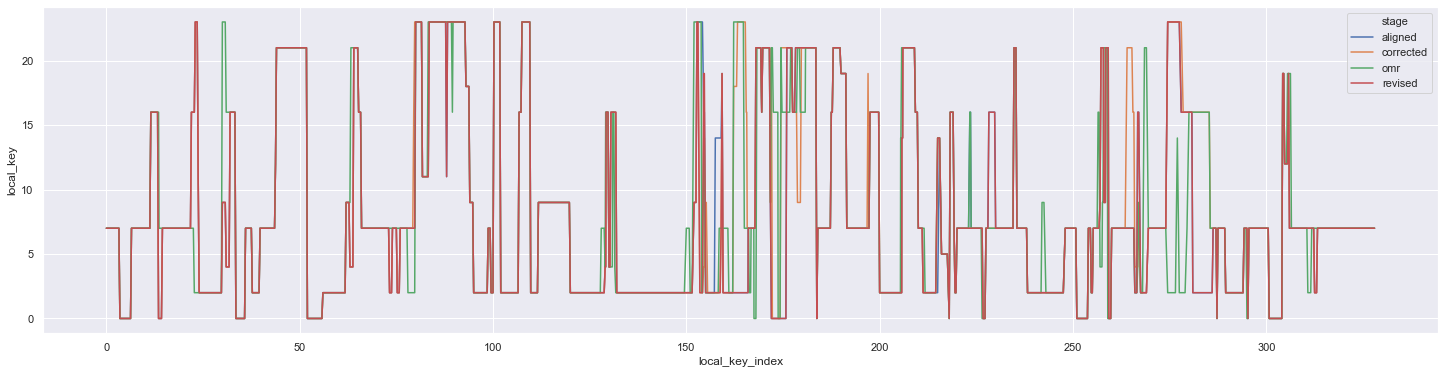

4_op44ii_4
['e', 'e', 'e', 'e']
       local_key_index    stage  local_key
0                  0.0  aligned       16.0
1                  0.5  aligned       16.0
2                  1.0  aligned       16.0
3                  1.5  aligned       16.0
4                  2.0  aligned       16.0
...                ...      ...        ...
11987           1536.5  revised       16.0
11988           1539.0  revised       16.0
11989           1539.5  revised       16.0
11990           1542.0  revised       16.0
11991           1542.5  revised       16.0

[11992 rows x 3 columns]


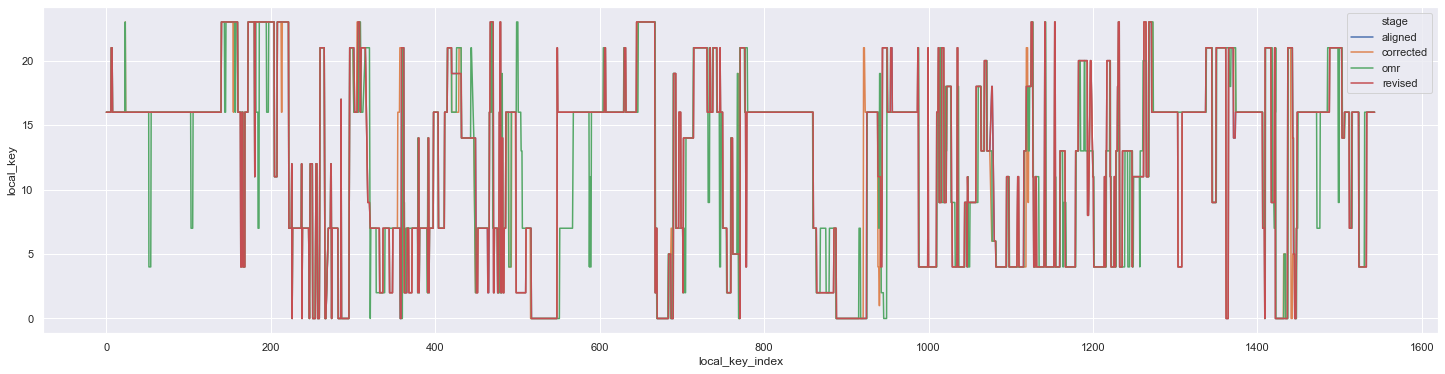

5_op44iii_1
['Eb', 'Eb', 'Eb', 'Eb']
       local_key_index    stage  local_key
0                 0.00  aligned        3.0
1                 0.25  aligned        3.0
2                 0.50  aligned        3.0
3                 0.75  aligned        3.0
4                 1.00  aligned        3.0
...                ...      ...        ...
18463          1474.00  revised        3.0
18464          1475.00  revised        3.0
18465          1476.00  revised        3.0
18466          1478.00  revised        3.0
18467          1480.00  revised        3.0

[18468 rows x 3 columns]


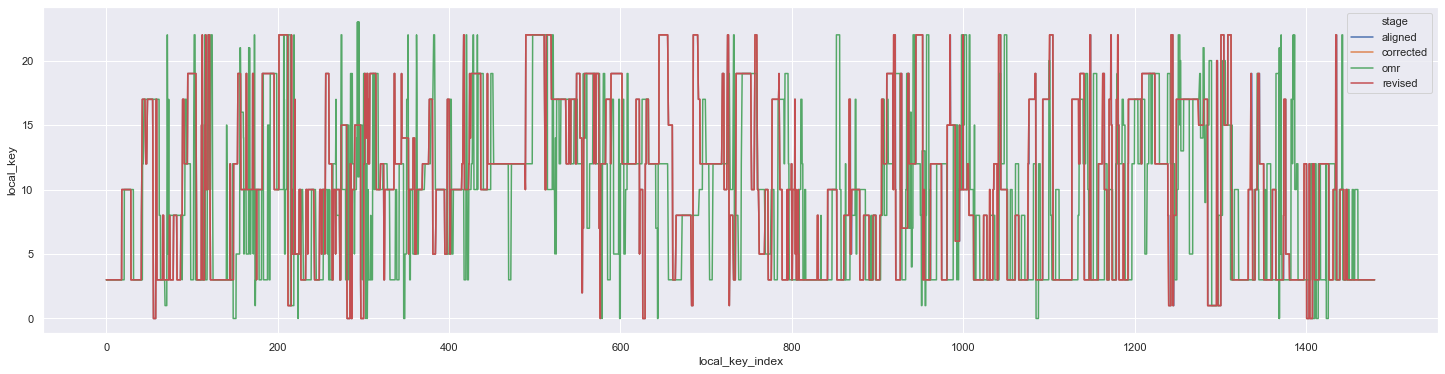

5_op44iii_2
['c', 'c', 'c', 'c']
      local_key_index    stage  local_key
0                 0.0  aligned       12.0
1                 0.5  aligned       12.0
2                 1.0  aligned       12.0
3                 1.5  aligned       12.0
4                 2.0  aligned       12.0
...               ...      ...        ...
7667            901.0  revised       12.0
7668            903.5  revised       12.0
7669            904.0  revised       12.0
7670            906.5  revised       12.0
7671            907.0  revised       12.0

[7672 rows x 3 columns]


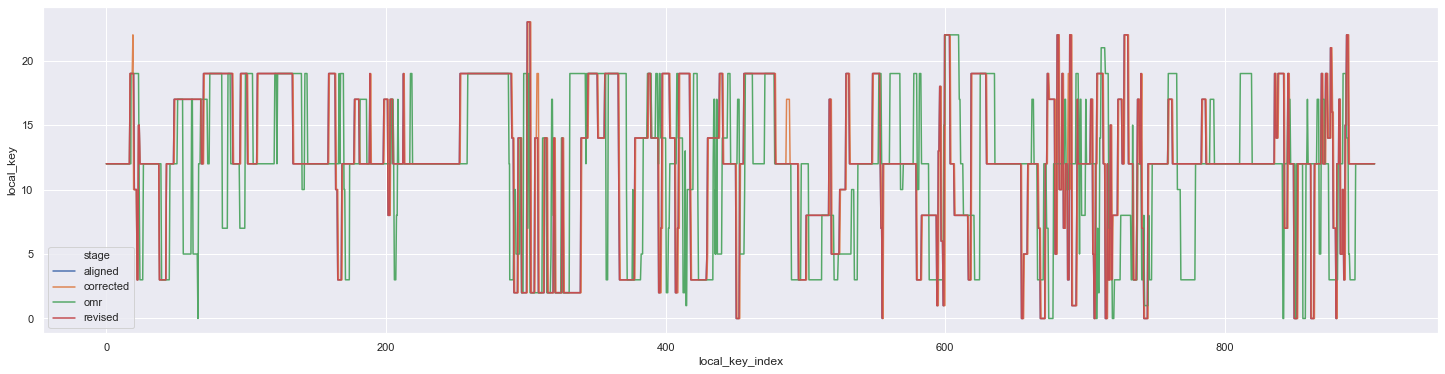

5_op44iii_3
['Ab', 'Ab', 'Ab', 'Ab']
      local_key_index    stage  local_key
0            0.000000  aligned        8.0
1            1.000000  aligned        8.0
2            1.500000  aligned        8.0
3            2.000000  aligned        8.0
4            2.333333  aligned        8.0
...               ...      ...        ...
5963       388.000000  revised        8.0
5964       388.750000  revised        8.0
5965       389.000000  revised        8.0
5966       389.750000  revised        8.0
5967       390.000000  revised        8.0

[5968 rows x 3 columns]


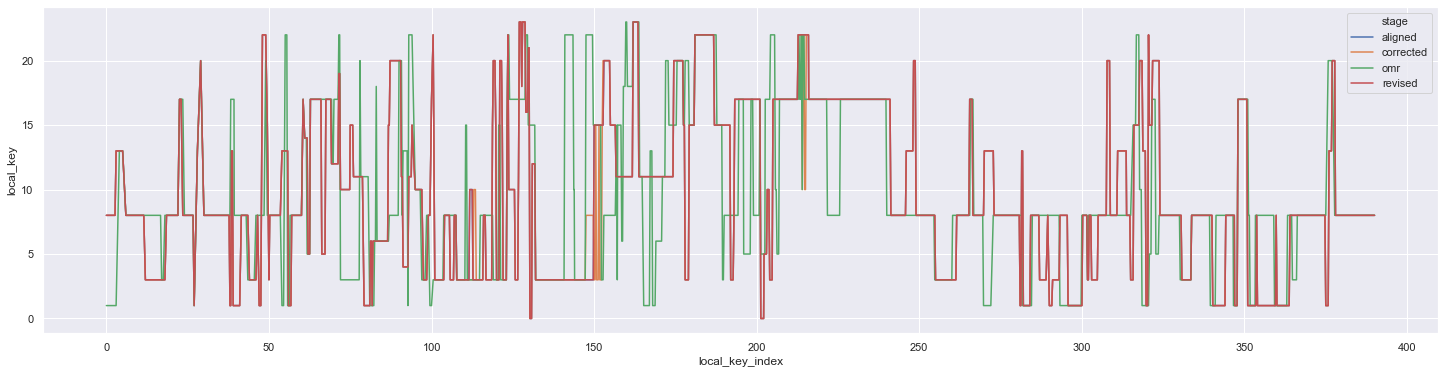

5_op44iii_4
['Eb', 'Eb', 'Eb', 'Eb']
       local_key_index    stage  local_key
0                 0.00  aligned        3.0
1                 0.25  aligned        3.0
2                 0.50  aligned        3.0
3                 0.75  aligned        3.0
4                 1.00  aligned        3.0
...                ...      ...        ...
16147          1286.50  revised       10.0
16148          1286.75  revised       10.0
16149          1287.00  revised       10.0
16150          1289.00  revised        3.0
16151          1291.00  revised        3.0

[16152 rows x 3 columns]


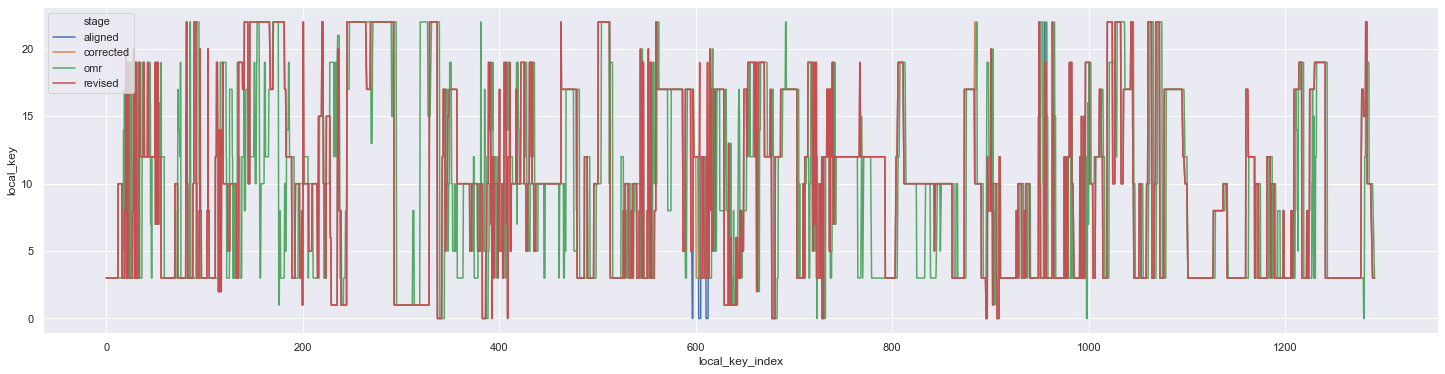

FP_op81_1
['E', 'E', 'E', 'E']
      local_key_index    stage  local_key
0            0.000000  aligned        4.0
1            0.333333  aligned        4.0
2            0.500000  aligned        4.0
3            0.666667  aligned        4.0
4            1.000000  aligned        4.0
...               ...      ...        ...
6571       452.000000  revised        4.0
6572       452.500000  revised        4.0
6573       453.000000  revised        4.0
6574       453.500000  revised        4.0
6575       454.000000  revised        4.0

[6576 rows x 3 columns]


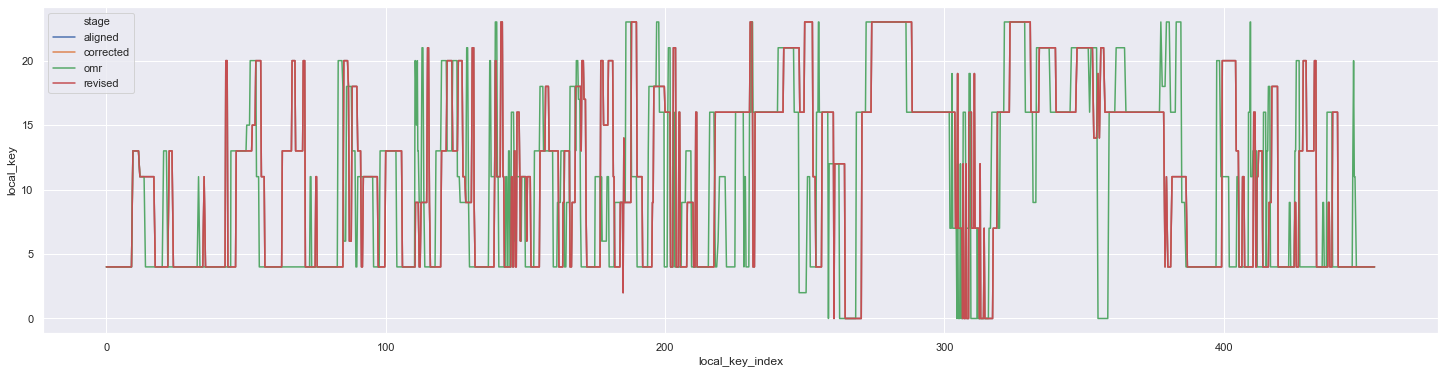

FP_op81_2
['a', 'a', 'a', 'a']
      local_key_index    stage  local_key
0                0.00  aligned        9.0
1                0.50  aligned        9.0
2                0.75  aligned        9.0
3                1.00  aligned        9.0
4                1.25  aligned        9.0
...               ...      ...        ...
6007           440.50  revised       21.0
6008           441.00  revised       21.0
6009           442.25  revised       21.0
6010           442.50  revised       21.0
6011           444.00  revised       21.0

[6012 rows x 3 columns]


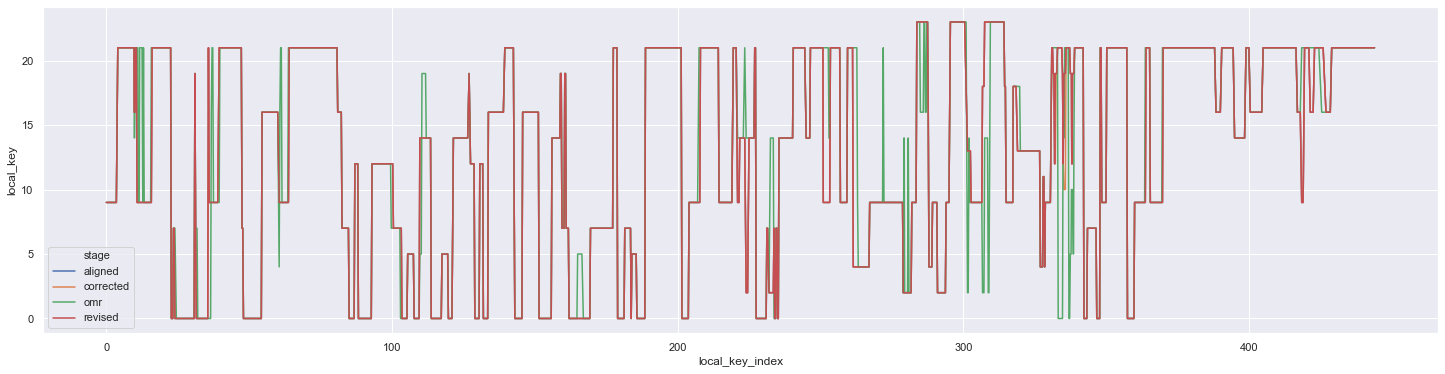

FP_op81_3
['e', 'e', 'e', 'e']
      local_key_index    stage  local_key
0                 0.0  aligned       16.0
1                 0.5  aligned       16.0
2                 1.0  aligned       16.0
3                 1.5  aligned       16.0
4                 2.0  aligned       16.0
...               ...      ...        ...
9603            690.5  revised       16.0
9604            691.0  revised       16.0
9605            692.0  revised       16.0
9606            694.0  revised       16.0
9607            696.0  revised       16.0

[9608 rows x 3 columns]


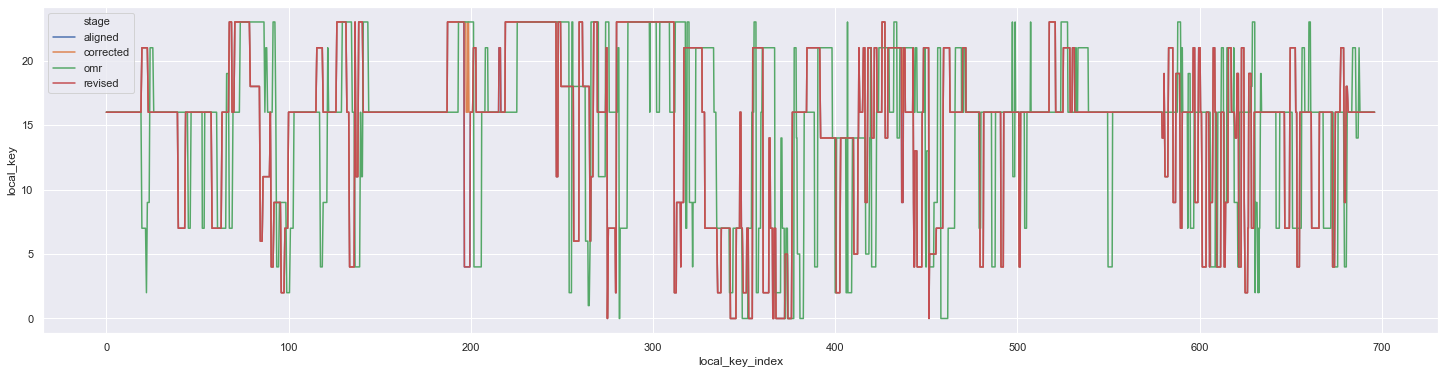

FP_op81_4
['Eb', 'Eb', 'Eb', 'Eb']
      local_key_index    stage  local_key
0                 0.0  aligned        8.0
1                 2.0  aligned        8.0
2                 4.0  aligned        8.0
3                 7.0  aligned        8.0
4                 8.0  aligned        8.0
...               ...      ...        ...
3815            600.0  revised        3.0
3816            601.0  revised        3.0
3817            602.0  revised        3.0
3818            603.0  revised        3.0
3819            604.0  revised        3.0

[3820 rows x 3 columns]


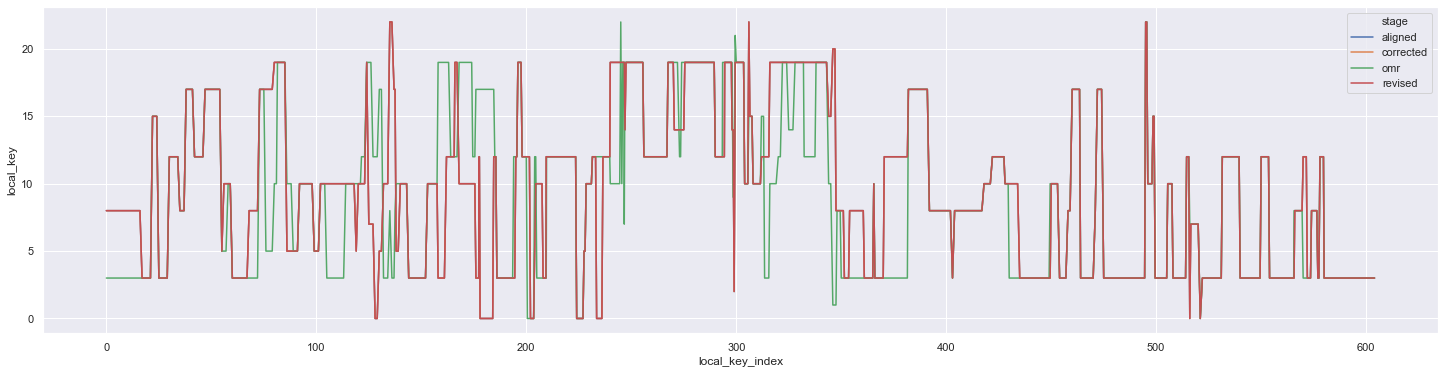

In [38]:
global_key_columns = ['global_key_omr', 'global_key_corrected', 'global_key_revised', 'global_key_aligned']
local_key_columns = ['local_keys_omr', 'local_keys_corrected', 'local_keys_revised', 'local_keys_aligned']
for f, d in analyses_by_file.items():
    print(f)
    df = pd.DataFrame(d, index=d['local_key_index'])
    keys = [df[col][0] for col in global_key_columns]
    df.drop(columns=global_key_columns, inplace=True)
    # Not all stages had the same slices at the same offsets
    # Filling the gaps with the local key of the previous slice    
    df.fillna(method='ffill', inplace=True)
    df = df.rename(columns={k: k.replace('local_keys_', '') for k in local_key_columns})
    df = df.melt(id_vars=['local_key_index'], var_name='stage', value_name='local_key')
#     df = df.set_index(df['local_key_index'])    
    print(keys)
    print(df)
    plt.figure(figsize=(25, 6))
    sns.lineplot(x='local_key_index', y='local_key', hue='stage', data=df)
    plt.show()    